In [22]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv('cellphones_data.csv')

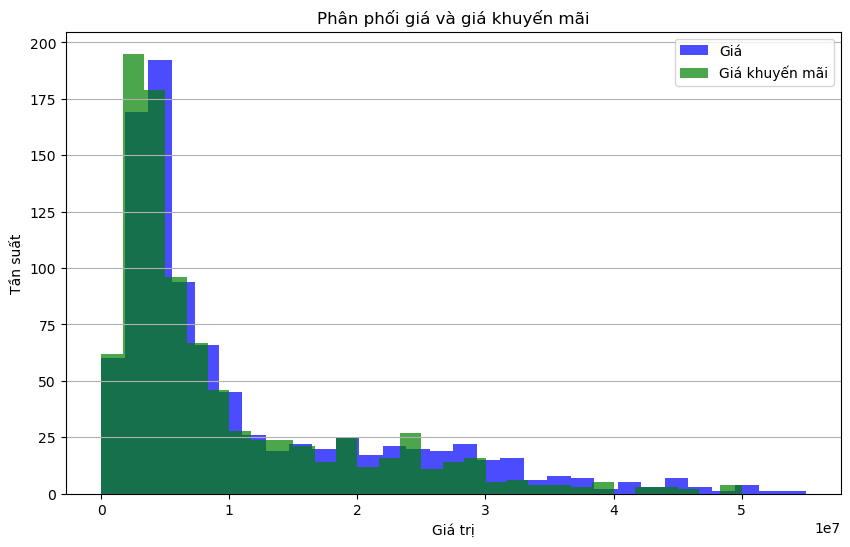

Thống kê nhóm có giá:
                Giá  Giá khuyến mãi
count  9.160000e+02    9.160000e+02
mean   1.111013e+07    9.493865e+06
std    1.093834e+07    9.556025e+06
min    1.000000e+03    4.000000e+03
25%    3.680000e+06    3.090000e+06
50%    6.290000e+06    5.340000e+06
75%    1.599000e+07    1.251500e+07
max    5.499000e+07    5.000000e+07
Số lượng sản phẩm có thông tin giá: 916
Số lượng sản phẩm thiếu thông tin giá: 918


In [14]:
file_path = 'cellphones_data.csv' 
data = pd.read_csv(file_path)
data['Giá'] = pd.to_numeric(data['Giá'], errors='coerce')
data['Giá khuyến mãi'] = pd.to_numeric(data['Giá khuyến mãi'], errors='coerce')

# Chia dữ liệu thành hai nhóm
group_with_price = data.dropna(subset=['Giá', 'Giá khuyến mãi'])
group_without_price = data[data[['Giá', 'Giá khuyến mãi']].isnull().any(axis=1)]

# Thống kê dữ liệu nhóm có giá
statistics = group_with_price[['Giá', 'Giá khuyến mãi']].describe()

# Trực quan hóa dữ liệu
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ phân phối giá
plt.hist(group_with_price['Giá'], bins=30, alpha=0.7, label='Giá', color='blue')
plt.hist(group_with_price['Giá khuyến mãi'], bins=30, alpha=0.7, label='Giá khuyến mãi', color='green')

plt.title('Phân phối giá và giá khuyến mãi')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.legend()
plt.grid(axis='y')
plt.show()

print("Thống kê nhóm có giá:")
print(statistics)

print(f"Số lượng sản phẩm có thông tin giá: {len(group_with_price)}")
print(f"Số lượng sản phẩm thiếu thông tin giá: {len(group_without_price)}")


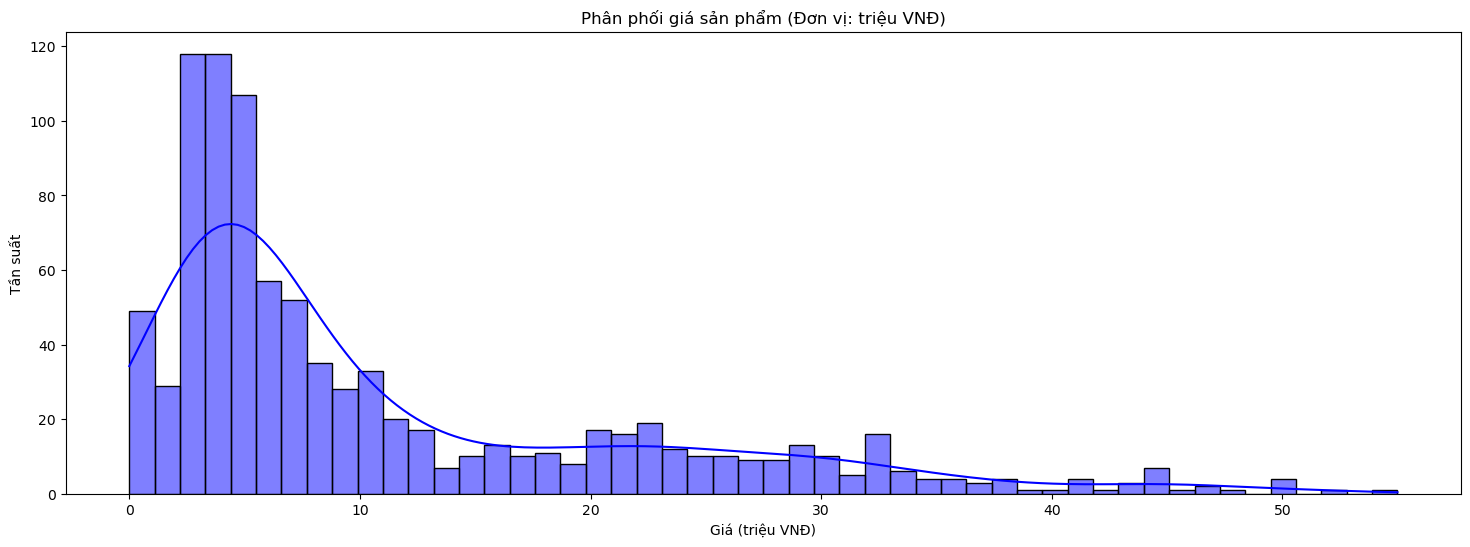

In [15]:
plt.figure(figsize=(18, 6))

# Chuyển đổi đơn vị giá sang triệu đồng
data['Giá (triệu VNĐ)'] = data['Giá'] / 1_000_000  

sns.histplot(data['Giá (triệu VNĐ)'], bins=50, kde=True, color='blue')
plt.title('Phân phối giá sản phẩm (Đơn vị: triệu VNĐ)')
plt.xlabel('Giá (triệu VNĐ)')
plt.ylabel('Tần suất')
plt.show()


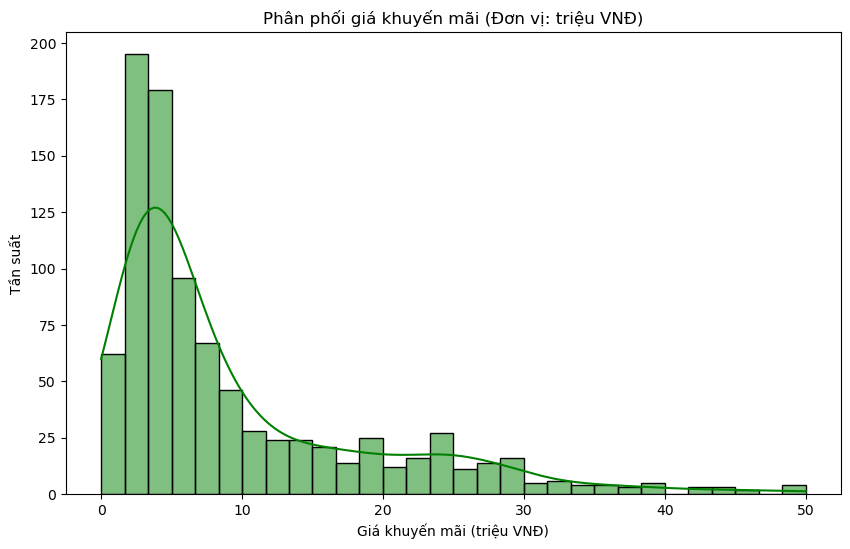

In [18]:


# Chuyển đổi đơn vị giá khuyến mãi sang triệu VNĐ
filtered_data_promotion['Giá khuyến mãi (triệu VNĐ)'] = filtered_data_promotion['Giá khuyến mãi'] / 1_000_000  

plt.figure(figsize=(10, 6))
sns.histplot(filtered_data_promotion['Giá khuyến mãi (triệu VNĐ)'], bins=30, kde=True, color='green')
plt.title('Phân phối giá khuyến mãi (Đơn vị: triệu VNĐ)')
plt.xlabel('Giá khuyến mãi (triệu VNĐ)')
plt.ylabel('Tần suất')
plt.show()


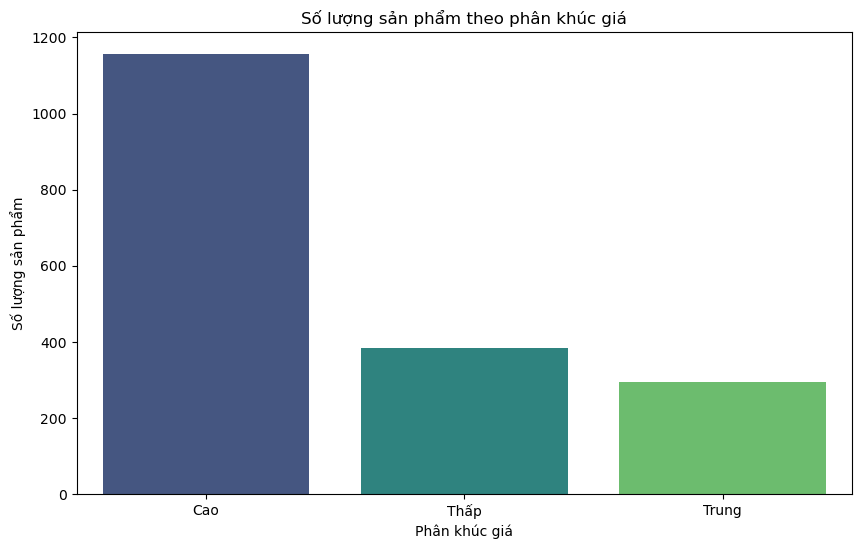

In [19]:
def classify_price(price):
    if price < 5000000:
        return 'Thấp'
    elif price < 15000000:
        return 'Trung'
    else:
        return 'Cao'

# Áp dụng phân khúc giá vào cột 'Phân khúc giá'
filtered_data_price['Phân khúc giá'] = filtered_data_price['Giá'].apply(classify_price)

plt.figure(figsize=(10, 6))
sns.countplot(x='Phân khúc giá', data=filtered_data_price, palette='viridis')
plt.title('Số lượng sản phẩm theo phân khúc giá')
plt.xlabel('Phân khúc giá')
plt.ylabel('Số lượng sản phẩm')
plt.show()


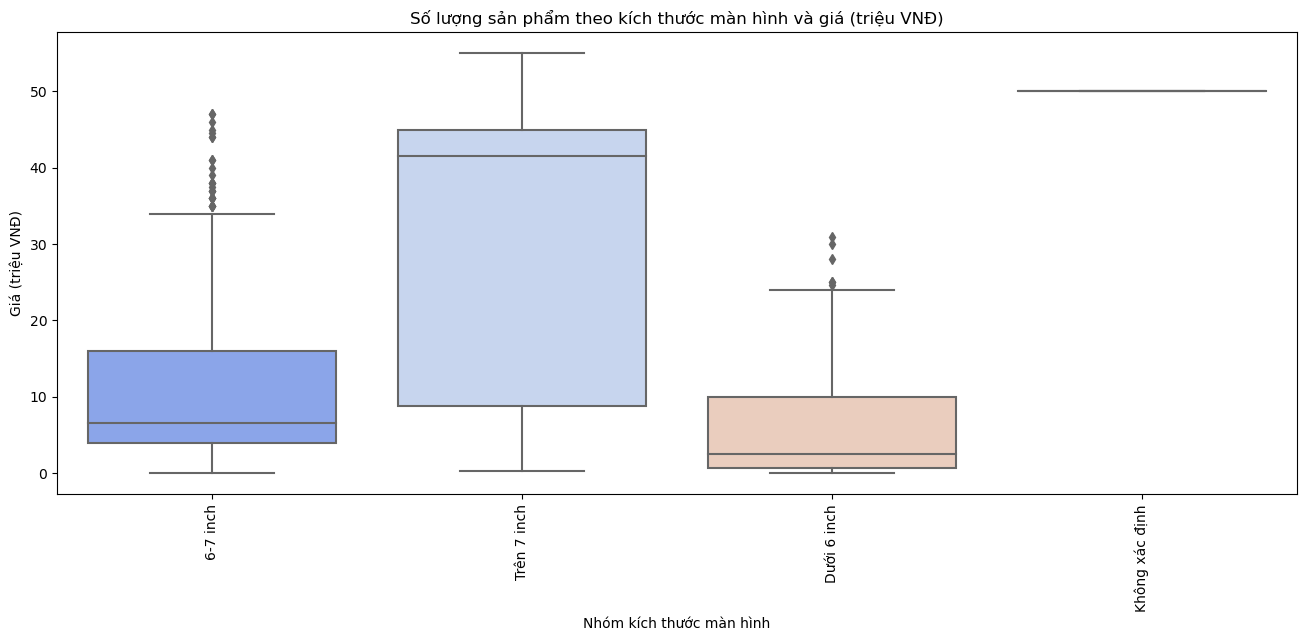

In [7]:
# Nhóm kích thước màn hình thành các nhóm
def group_screen_size(size):
    try:
        # Kiểm tra nếu giá trị là kiểu chuỗi
        if isinstance(size, str):
            size = size.replace(' inches', '').strip()
        # Nếu giá trị là float, không cần loại bỏ ' inches' nữa
        size = float(size)
        
        if size < 6:
            return 'Dưới 6 inch'
        elif size < 7:
            return '6-7 inch'
        else:
            return 'Trên 7 inch'
    except ValueError:
        return 'Không xác định'

# Áp dụng nhóm kích thước màn hình
data['Nhóm kích thước màn hình'] = data['Kích thước màn hình'].apply(group_screen_size)

# Chuyển đổi giá sang triệu VNĐ
data['Giá (triệu VNĐ)'] = data['Giá'] / 1_000_000  

# Loại bỏ các dòng có giá trị NaN trong cột 'Nhóm kích thước màn hình'
data_clean = data.dropna(subset=['Nhóm kích thước màn hình'])

# Vẽ boxplot với các nhóm kích thước màn hình
plt.figure(figsize=(16, 6))
sns.boxplot(x='Nhóm kích thước màn hình', y='Giá (triệu VNĐ)', data=data_clean, palette='coolwarm')
plt.title('Số lượng sản phẩm theo kích thước màn hình và giá (triệu VNĐ)')
plt.xlabel('Nhóm kích thước màn hình')
plt.ylabel('Giá (triệu VNĐ)')
plt.xticks(rotation=90)  
plt.show()


In [8]:

os_counts = data['Hệ điều hành'].value_counts()
print("Hệ điều hành phổ biến nhất:\n", os_counts)


Hệ điều hành phổ biến nhất:
 Hệ điều hành
Android 13                       203
Android 12                       135
Android 14                       102
Android 11                        96
Android 9.0 (Pie)                 85
                                ... 
Android 8 Oreo (Android One)       1
8                                  1
Android™ Oreo™ (Phiên bản Go)      1
VOS                                1
EMUI 11                            1
Name: count, Length: 291, dtype: int64


In [9]:
price_stats = data['Giá (triệu VNĐ)'].describe()
print("Thống kê giá:\n", price_stats)


Thống kê giá:
 count    916.000000
mean      11.110130
std       10.938337
min        0.001000
25%        3.680000
50%        6.290000
75%       15.990000
max       54.990000
Name: Giá (triệu VNĐ), dtype: float64


In [10]:
# Tỉ lệ phần trăm của các hệ điều hành
os_percentage = data['Hệ điều hành'].value_counts(normalize=True) * 100
print("Tỉ lệ phần trăm các hệ điều hành:\n", os_percentage)


Tỉ lệ phần trăm các hệ điều hành:
 Hệ điều hành
Android 13                       13.524317
Android 12                        8.994004
Android 14                        6.795470
Android 11                        6.395736
Android 9.0 (Pie)                 5.662891
                                   ...    
Android 8 Oreo (Android One)      0.066622
8                                 0.066622
Android™ Oreo™ (Phiên bản Go)     0.066622
VOS                               0.066622
EMUI 11                           0.066622
Name: proportion, Length: 291, dtype: float64


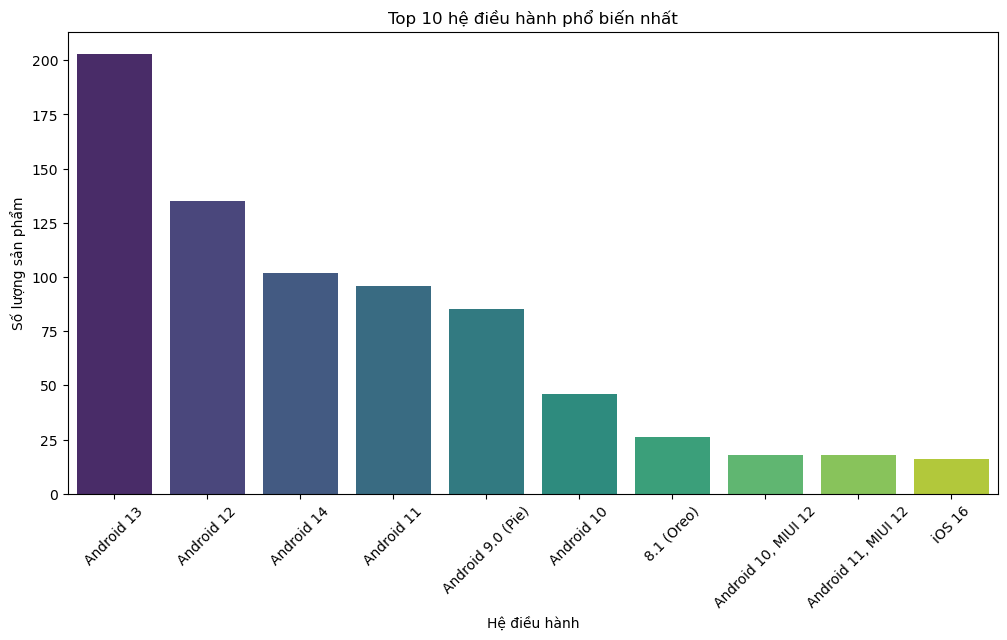

In [11]:
top_n = 10

plt.figure(figsize=(12, 6))
sns.barplot(x=os_count_top.index, y=os_count_top.values, palette='viridis')
plt.title(f'Top {top_n} hệ điều hành phổ biến nhất')
plt.xlabel('Hệ điều hành')
plt.ylabel('Số lượng sản phẩm')
plt.xticks(rotation=45)
plt.show()


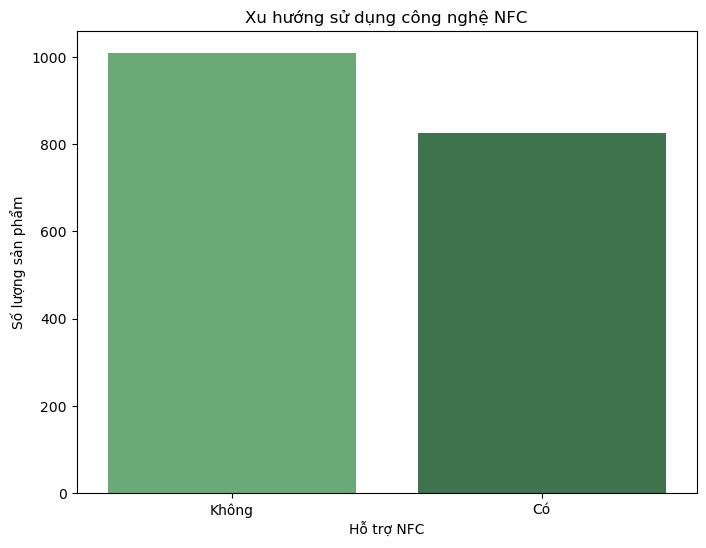

In [ ]:
# Phân tích xu hướng công nghệ NFC
nfc_counts = data['Công nghệ NFC'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=nfc_counts.index, y=nfc_counts.values, palette='Greens_d')
plt.title('Xu hướng sử dụng công nghệ NFC')
plt.xlabel('Hỗ trợ NFC')
plt.ylabel('Số lượng sản phẩm')
plt.show()


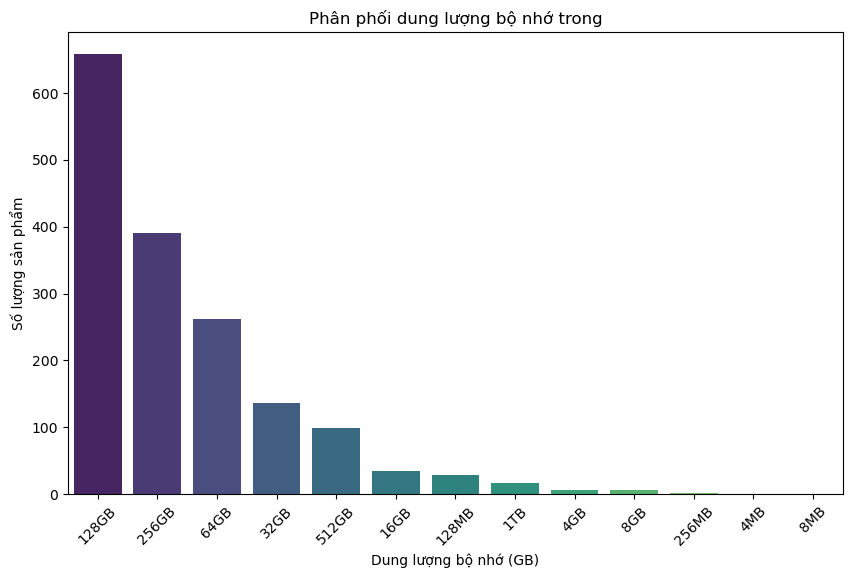

In [32]:
# Phân phối dung lượng bộ nhớ trong
memory_distribution = data['Bộ nhớ trong'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=memory_distribution.index, y=memory_distribution.values, palette='viridis')
plt.title('Phân phối dung lượng bộ nhớ trong')
plt.xlabel('Dung lượng bộ nhớ (GB)')
plt.ylabel('Số lượng sản phẩm')
plt.xticks(rotation=45)
plt.show()


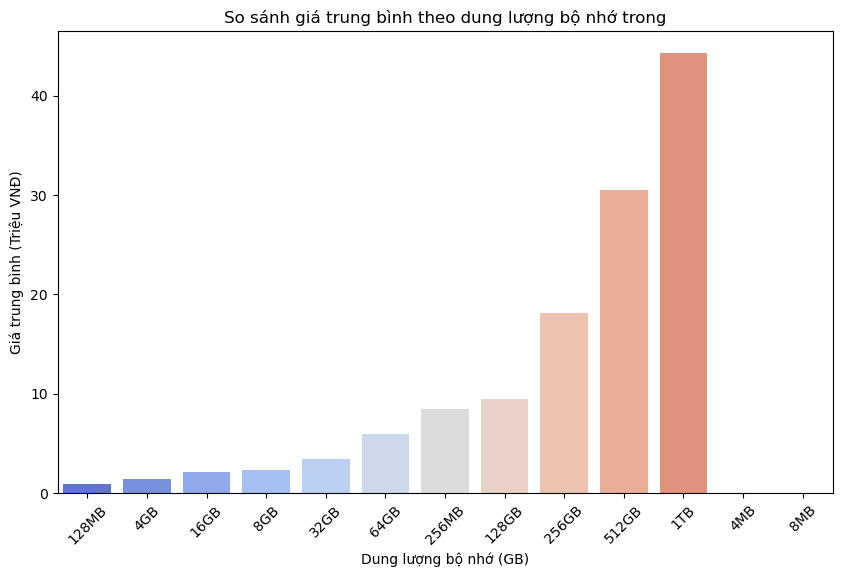

In [31]:
# Tính giá trung bình theo đơn vị triệu VNĐ cho từng loại bộ nhớ trong
memory_vs_price = data.groupby('Bộ nhớ trong')['Giá'].mean() / 1_000_000  # Chuyển sang triệu VNĐ
memory_vs_price = memory_vs_price.sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=memory_vs_price.index, y=memory_vs_price.values, palette='coolwarm')
plt.title('So sánh giá trung bình theo dung lượng bộ nhớ trong')
plt.xlabel('Dung lượng bộ nhớ (GB)')
plt.ylabel('Giá trung bình (Triệu VNĐ)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
def extract_resolution(text):
    if isinstance(text, str):  # Kiểm tra nếu là chuỗi
        match = re.search(r"(\d+)(?=MP)", text)
        return int(match.group(1)) if match else None
    return None  # Trả về None nếu không phải chuỗi

# Xử lý cột Camera sau và Camera trước
data['Độ phân giải camera sau (MP)'] = data['Camera sau'].apply(extract_resolution)
data['Độ phân giải camera trước (MP)'] = data['Camera trước'].apply(extract_resolution)



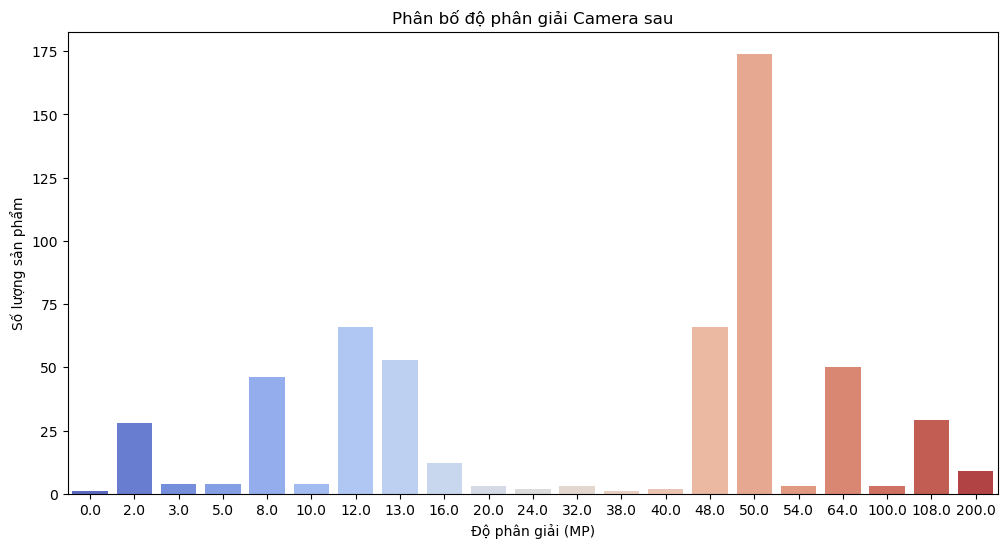

In [30]:
camera_sau_count = data['Độ phân giải camera sau (MP)'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=camera_sau_count.index, y=camera_sau_count.values, palette='coolwarm')
plt.title('Phân bố độ phân giải Camera sau')
plt.xlabel('Độ phân giải (MP)')
plt.ylabel('Số lượng sản phẩm')
plt.show()

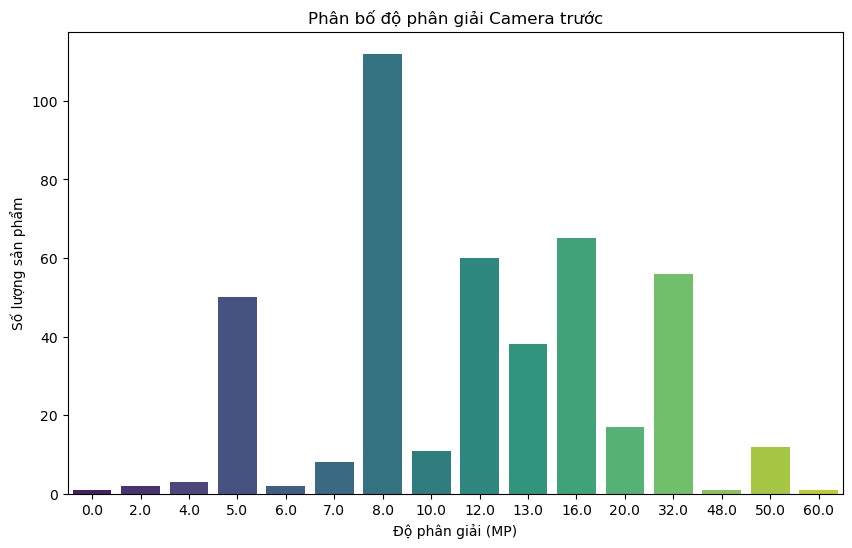

In [25]:
camera_truoc_count = data['Độ phân giải camera trước (MP)'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=camera_truoc_count.index, y=camera_truoc_count.values, palette='viridis')
plt.title('Phân bố độ phân giải Camera trước')
plt.xlabel('Độ phân giải (MP)')
plt.ylabel('Số lượng sản phẩm')
plt.show()


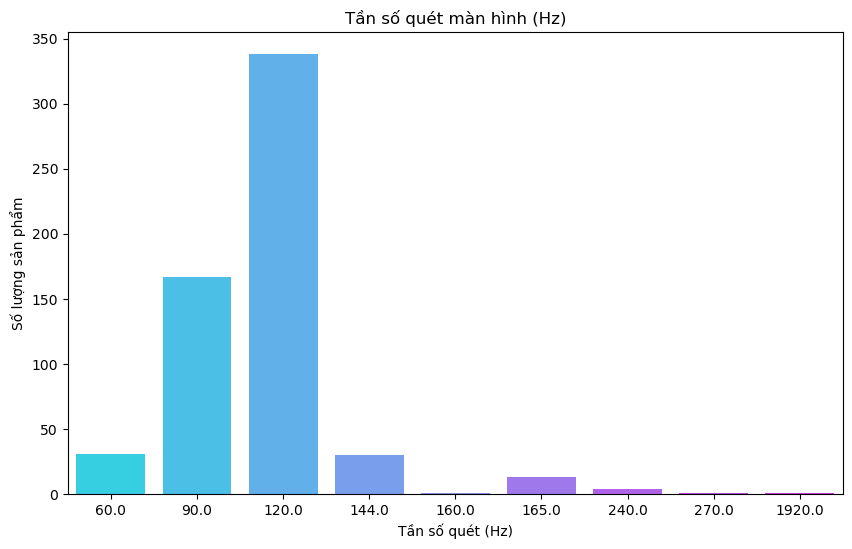

In [26]:
def extract_refresh_rate(text):
    if isinstance(text, str):
        match = re.search(r"(\d+)Hz", text)
        return int(match.group(1)) if match else None
    return None

data['Tần số quét màn hình (Hz)'] = data['Tính năng màn hình'].apply(extract_refresh_rate)
refresh_rate_count = data['Tần số quét màn hình (Hz)'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=refresh_rate_count.index, y=refresh_rate_count.values, palette='cool')
plt.title('Tần số quét màn hình (Hz)')
plt.xlabel('Tần số quét (Hz)')
plt.ylabel('Số lượng sản phẩm')
plt.show()


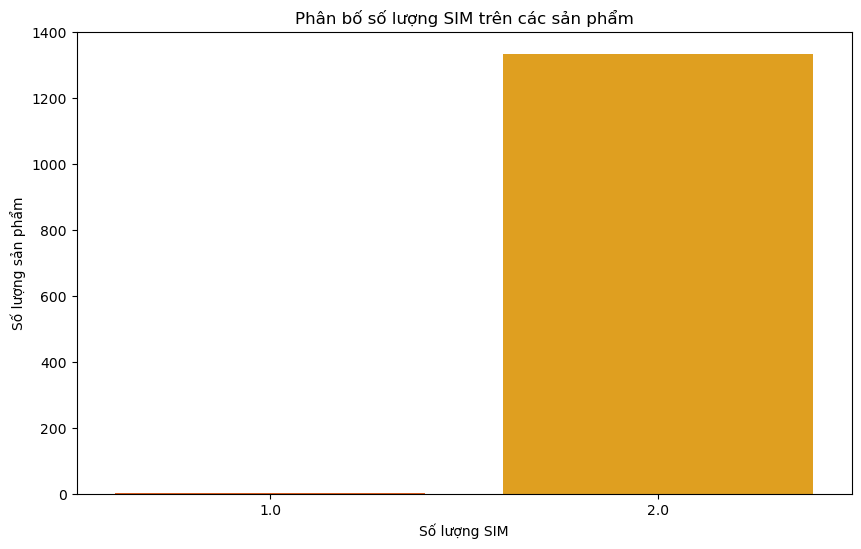

In [27]:
data['Số lượng SIM'] = data['Thẻ SIM'].apply(lambda x: 2 if '2' in str(x) else (1 if '1' in str(x) else None))
sim_count = data['Số lượng SIM'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=sim_count.index, y=sim_count.values, palette='autumn')
plt.title('Phân bố số lượng SIM trên các sản phẩm')
plt.xlabel('Số lượng SIM')
plt.ylabel('Số lượng sản phẩm')
plt.show()


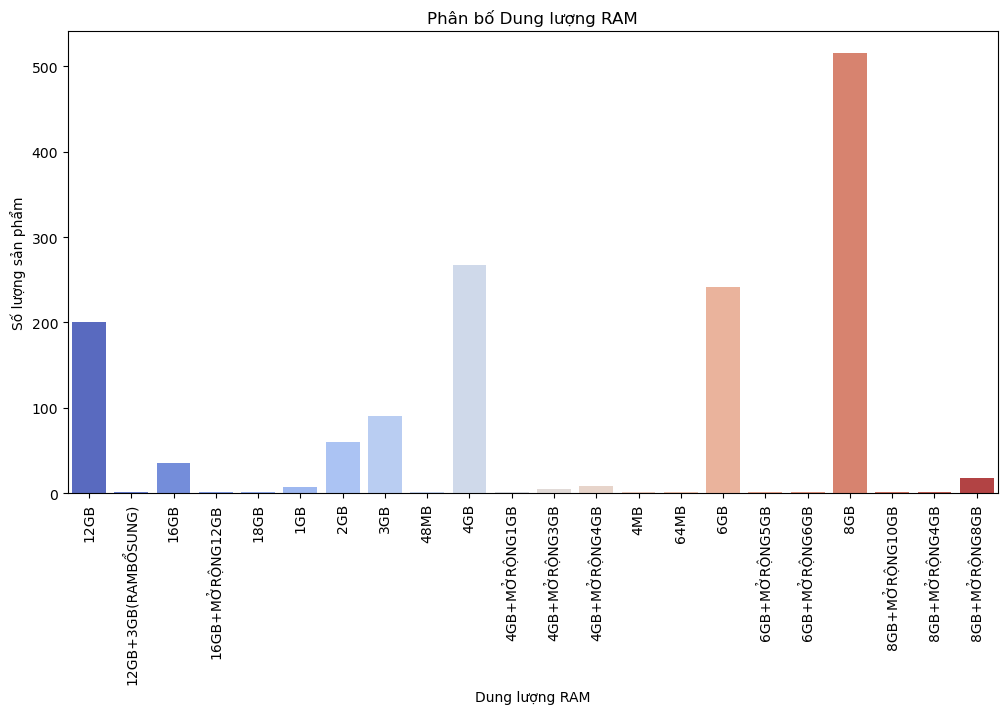

In [34]:
ram_count = data['Dung lượng RAM'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=ram_count.index, y=ram_count.values, palette='coolwarm')

plt.title('Phân bố Dung lượng RAM')
plt.xlabel('Dung lượng RAM')
plt.ylabel('Số lượng sản phẩm')
plt.xticks(rotation=90) 
plt.show()


In [36]:
# Hàm chuẩn hóa độ phân giải màn hình
def normalize_resolution(value):
    value = str(value).lower()
    if 'fullhd+' in value:
        return 'FullHD+'
    elif 'fullhd' in value:
        return 'FullHD'
    elif 'qhd' in value or '2560 x' in value:
        return 'QHD'
    elif 'hd' in value or '1280 x' in value:
        return 'HD'
    elif '4k' in value:
        return '4K'
    return 'Khác'



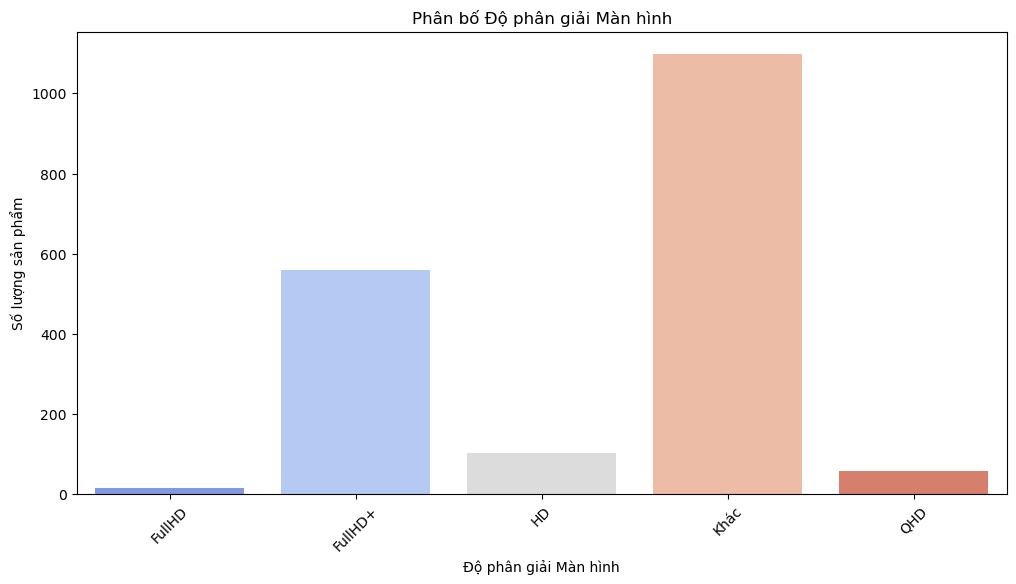

In [37]:
data["Độ phân giải màn hình"] = data["Độ phân giải màn hình"].apply(normalize_resolution)

resolution_count = data['Độ phân giải màn hình'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=resolution_count.index, y=resolution_count.values, palette='coolwarm')
plt.title('Phân bố Độ phân giải Màn hình')
plt.xlabel('Độ phân giải Màn hình')
plt.ylabel('Số lượng sản phẩm')
plt.xticks(rotation=45)  
plt.show()

In [ ]:
from wordcloud import WordCloud

def clean_text(text):
    # Chuyển về chữ thường và loại bỏ các ký tự không cần thiết
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text) 
    return text
data['Tính năng màn hình'] = data['Tính năng màn hình'].apply(clean_text)

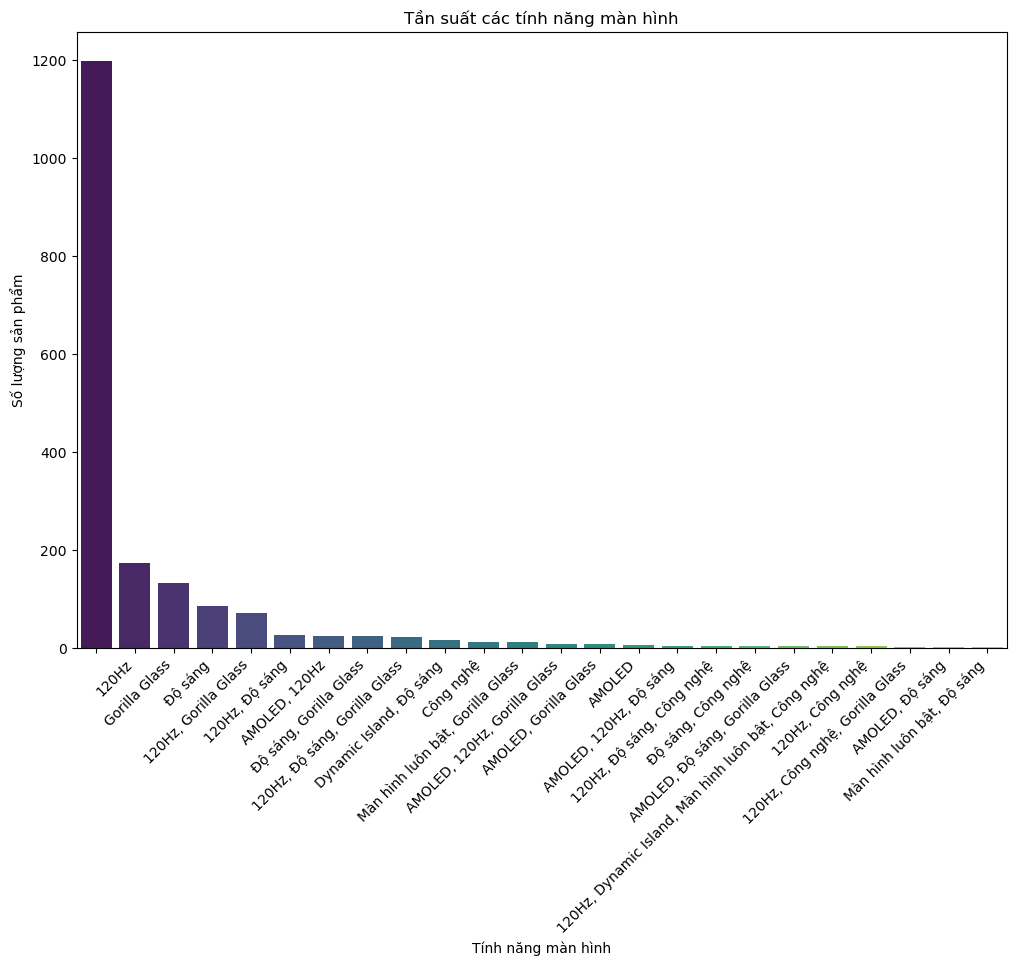

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

def categorize_screen_features(features):
    # Nhóm tính năng theo các nhóm chính
    categories = ['AMOLED', '120Hz', 'Dynamic Island', 'Màn hình luôn bật', 'Độ sáng', 'Haptic feedback', 'Công nghệ', 'Gorilla Glass']
    categories_found = [category for category in categories if category.lower() in features.lower()]
    return ", ".join(categories_found)

# Áp dụng phân loại
data['Tính năng màn hình nhóm'] = data['Tính năng màn hình'].apply(categorize_screen_features)

feature_counts = data['Tính năng màn hình nhóm'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_counts.index, y=feature_counts.values, palette='viridis')
plt.title('Tần suất các tính năng màn hình')
plt.xlabel('Tính năng màn hình')
plt.ylabel('Số lượng sản phẩm')
plt.xticks(rotation=45, ha='right')
plt.show()
